In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import yfinance as yf
import datetime 

In [9]:
#data

def get_historical_prices(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date, progress=False,interval="1wk")
    # return data['Close']
    return data
# Define the tickers index
 
#S&P 500 ^GSPC'
#Dowjones '^DJI'
#FTSE '^FTSE
tickers = '^GSPC'
# Calculate the start and end dates for the last six months
end = datetime.date.today() #out-of-sample
start = end  - datetime.timedelta(days=1000) #out-of-sample

# Retrieve the historical prices for the tickers
prices = get_historical_prices(tickers, start, end)
prices.shape,prices

((143, 6),
                    Open         High          Low        Close    Adj Close   
 Date                                                                          
 2021-03-22  3916.479980  3978.189941  3853.500000  3974.540039  3974.540039  \
 2021-03-29  3969.310059  4020.629883  3943.250000  4019.870117  4019.870117   
 2021-04-05  4034.439941  4129.479980  4034.439941  4128.799805  4128.799805   
 2021-04-12  4124.709961  4191.310059  4114.819824  4185.470215  4185.470215   
 2021-04-19  4179.799805  4194.169922  4118.379883  4180.169922  4180.169922   
 ...                 ...          ...          ...          ...          ...   
 2023-11-13  4406.660156  4521.169922  4393.819824  4514.020020  4514.020020   
 2023-11-20  4511.700195  4568.430176  4510.359863  4559.339844  4559.339844   
 2023-11-27  4554.859863  4599.390137  4537.240234  4594.629883  4594.629883   
 2023-12-04  4564.370117  4609.229980  4546.500000  4604.370117  4604.370117   
 2023-12-11  4593.390137  473

<AxesSubplot: xlabel='Date'>

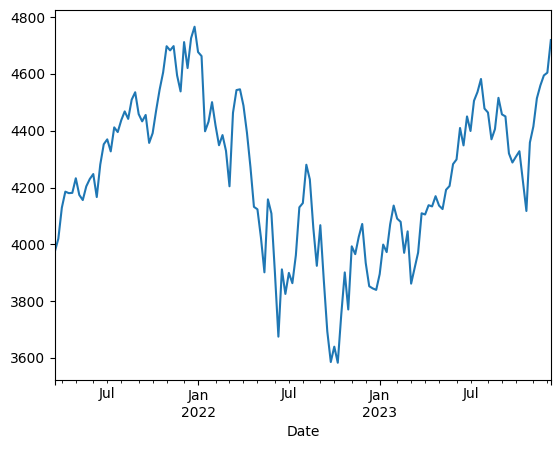

In [16]:
prices['Close'].plot()

('mean:',
 0.0016694310190591079,
 'std:',
 1.3786806925961819,
 'jump:',
 0.09709172813893097,
 'dump:',
 -0.08158437834461651,
 <AxesSubplot: xlabel='Date'>)

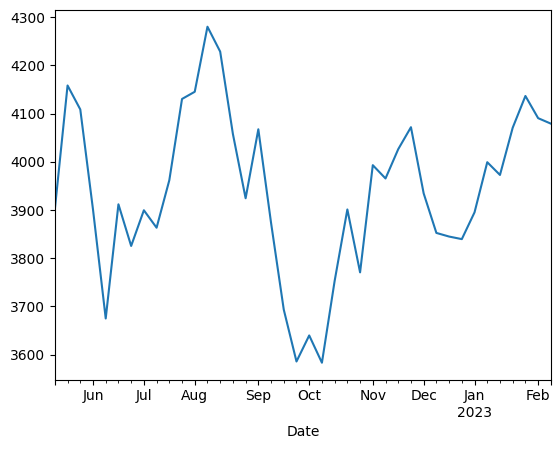

In [58]:
sp,ep = 60,100
mean = prices['Close'][sp:ep].pct_change().mean()
std  = prices['Close'][sp:ep].pct_change().std()/prices['Close'].pct_change().std()
jump = (max(prices['Close'][sp:ep])/(prices['Close'][sp]))-1  
dump = (min(prices['Close'][sp:ep])/(prices['Close'][sp]))-1  
'mean:', mean,'std:', std,'jump:', jump, 'dump:', dump, prices['Close'][sp:ep].plot()